In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
import cv2

In [3]:
df = pd.read_csv('train_mpii_datasets.csv')
df.head(7)

,filename,xmin_head,ymin_head,xmax_head,ymax_head,scale,activity,category,right_ankle_x,right_knee_x,...,pelvis_invis,thorax_invis,upper_neck_invis,head_top_invis,right_wrist_invis,right_elbow_invis,right_shoulder_invis,left_shoulder_invis,left_elbow_invis,left_wrist_invis
0,015601864.jpg,627,100,706,198,3.021046,curling,sports,620,616,...,0,1,0,0,1,1,1,1,1,1
1,015601864.jpg,841,145,902,228,2.472117,curling,sports,895,910,...,0,0,0,0,1,1,0,1,1,1
2,015599452.jpg,607,70,752,255,5.641276,curling,sports,0,0,...,0,0,0,0,0,0,0,0,0,0
3,015599452.jpg,903,73,1070,263,6.071051,curling,sports,0,0,...,0,0,0,0,0,0,0,0,0,0
4,015599452.jpg,27,36,186,214,5.728162,curling,sports,0,0,...,0,0,0,0,0,0,0,0,0,0
5,005808361.jpg,914,79,1031,237,4.718488,curling,sports,804,816,...,1,1,0,0,1,1,1,1,1,1
6,005808361.jpg,427,66,549,221,4.734087,curling,sports,667,675,...,1,1,0,0,1,1,1,1,1,1


In [7]:
print(len(df['filename'].unique()))

17408


In [3]:
def draw_bbox(img, xmin, ymin, xmax, ymax):
    img_ = img.copy()
    return cv2.rectangle(img, (xmin, ymin), (xmax, ymax), thickness=4, color=(255, 0, 0))

In [12]:
filenames = df.filename.values
bboxes = df[['real_minX','real_minY','real_maxX','real_maxY']].astype('int32').values
print(bboxes, len(bboxes))

[[ 553  100  706  627]
 [ 830  145 1013  841]
 [   0    0  752  607]
 ...
 [ 386  138  500  400]
 [   0    0  263  225]
 [   0    0   76  416]] 28883


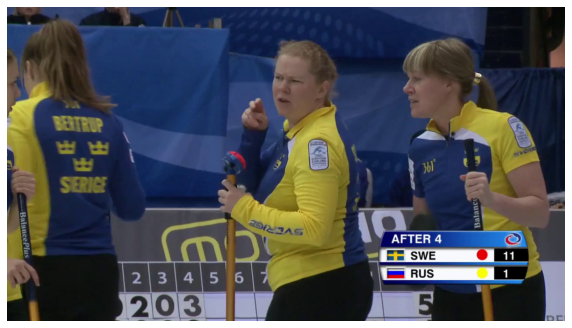

In [13]:
img = np.array(Image.open('/home/namirinz/Downloads/images/'+filenames[2]))
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

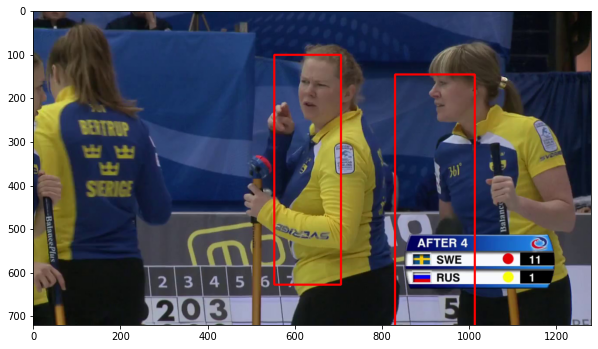

In [18]:
img_input = img.copy()
for i in range(2):
    img_ = draw_bbox(img_input, *bboxes[i])

plt.figure(figsize=(10, 10))
plt.imshow(img_)
#plt.axis('off')
plt.show()